<a href="https://colab.research.google.com/github/young-hwanlee/stand_alone_deep_learning/blob/main/%2327_Lab_Implementing_Vanilla_RNN_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

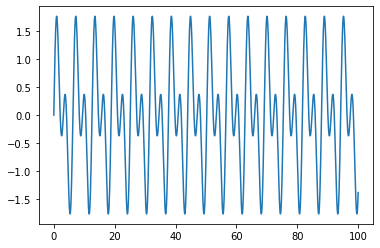

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# ===== Generate Dataset ===== #
num_data = 2400
t = np.linspace(0.0, 100.0, num_data)
y = np.sin(t) + np.sin(2*t)

plt.plot(t, y)

(2400,) (2400,)


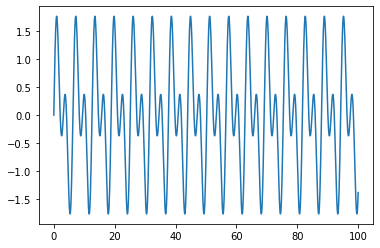

In [2]:
e = np.random.normal(0, 0.1, num_data)
print(y.shape, e.shape)
# y = y + e

plt.plot(t, y)

In [3]:
seq_len = 10    # sequence length
X = []
y_true = []
for i in range(len(t)-seq_len):
    X.append(y[i:i+seq_len])
    y_true.append(y[i+seq_len])

X = np.array(X)
y_true = np.array(y_true)
print(X.shape, y_true.shape)

X = np.swapaxes(X, 0, 1)
print(X.shape)

X = np.expand_dims(X, axis=2)
print(X.shape)

(2390, 10) (2390,)
(10, 2390)
(10, 2390, 1)


# Model Architecture

In [4]:
# import torch
# import torch.nn as nn

# class RNN(nn.Module):
#     def __init__(self, input_dim, output_dim, hid_dim):
#         super(RNN, self).__init__()

#         self.input_dim = input_dim
#         self.output_dim = output_dim
#         self.hid_dim = hid_dim

#         self.u = nn.Linear(self.input_dim, self.hid_dim, bias=False)
#         self.w = nn.Linear(self.hid_dim, self.hid_dim, bias=False)
#         self.v = nn.Linear(self.hid_dim, self.output_dim, bias=False)
#         self.act = nn.Tanh()

#         self.hidden = self.init_hidden()
    

#     def init_hidden(self):
#         return torch.zeros(1, self.hid_dim)


#     def forward(self, x):
#         h = self.act(self.u(x) + self.w(self.hidden))
#         y = self.v(h)
#         # --------------------------------------------------------------
#         self.hidden = h
#         # --------------------------------------------------------------
#         return y


# model = RNN(input_dim=1, output_dim=1, hid_dim=10)
# print(model.hidden)

# # ===== Train =====#
# for x in X:
#     x = torch.Tensor(x).float()
#     y_pred = model(x)

In [5]:
import torch
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_dim, output_dim, hid_dim, batch_size):
        super(RNN, self).__init__()

        self.input_dim = input_dim
        self.output_dim = output_dim
        self.hid_dim = hid_dim
        self.batch_size = batch_size

        self.u = nn.Linear(self.input_dim, self.hid_dim, bias=False)
        self.w = nn.Linear(self.hid_dim, self.hid_dim, bias=False)
        self.v = nn.Linear(self.hid_dim, self.output_dim, bias=False)
        self.act = nn.Tanh()

        self.hidden = self.init_hidden()
    

    def init_hidden(self, batch_size=None):
        if batch_size is None:
            batch_size = self.batch_size
        return torch.zeros(batch_size, self.hid_dim)
    

    def forward(self, x):
        h = self.act(self.u(x) + self.w(self.hidden))
        y = self.v(h)

        return y, h

In [6]:
model = RNN(input_dim=1, output_dim=1, hid_dim=100, batch_size=2390)
print(model.hidden)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [7]:
import torch.optim as optim

loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)

In [8]:
# ===== Train =====#
epoch = 100

for i in range(epoch):
    model.train()
    model.zero_grad()
    optimizer.zero_grad()
    model.hidden = model.init_hidden()

    for x in X:
        x = torch.Tensor(x).float()
        y_true = torch.Tensor(y_true).float()

        # --------------------------------------------------------------
        y_pred, hidden = model(x)
        model.hidden = hidden
        # --------------------------------------------------------------
        # # print(y_pred.shape, y_true.shape)
        # print(y_pred.view(-1).shape, y_true.view(-1).shape)

    loss = loss_fn(y_pred.view(-1), y_true.view(-1))
    # print(loss)

    loss.backward()
    optimizer.step()

    print(loss.item())

1.70928955078125
0.977433443069458
0.568043053150177
0.33761629462242126
0.2076490819454193
0.13428674638271332
0.09282492846250534
0.06931798160076141
0.05589984729886055
0.048142097890377045
0.04355695843696594
0.04074959456920624
0.03893924877047539
0.03768942132592201
0.03675633296370506
0.03600386157631874
0.03535604849457741
0.03477046266198158
0.034223392605781555
0.03370154649019241
0.033197443932294846
0.0327068492770195
0.032227326184511185
0.031757455319166183
0.031296368688344955
0.030843518674373627
0.030398540198802948
0.029961155727505684
0.02953115850687027
0.02910836599767208
0.028692614287137985
0.02828376181423664
0.027881670743227005
0.027486205101013184
0.027097240090370178
0.02671465463936329
0.026338325813412666
0.02596813626587391
0.025603974238038063
0.025245727971196175
0.02489328756928444
0.02454655058681965
0.024205410853028297
0.023869769647717476
0.023539526388049126
0.023214589804410934
0.022894861176609993
0.02258024923503399
0.02227066643536091
0.021966

In [9]:
print(X.shape)
test_X = np.expand_dims(X[:, 0, :], axis=1)
print(test_X.shape)

(10, 2390, 1)
(10, 1, 1)


In [10]:
list_y_pred = []

model.eval()
with torch.no_grad():
    model.hidden = model.init_hidden(batch_size=1)

    for x in test_X:
        # print(x.shape)
        x = torch.Tensor(x).float()
        y_pred, hidden = model(x)
        model.hidden = hidden
    
    # print(y_pred.shape, x.shape)
    list_y_pred.append(y_pred.view(-1).item())

    tmp_X = list()
    # print(np.asarray(tmp_X).shape)
    tmp_X += list(np.squeeze(test_X))[1:]
    # print(np.asarray(tmp_X).shape)
    tmp_X.append(y_pred.view(-1).item())
    # print(np.asarray(tmp_X).shape)
    for i in range(2389):
        model.hidden = model.init_hidden(batch_size=1)
        tmp2_X = torch.unsqueeze(torch.unsqueeze(torch.Tensor(tmp_X), 1), 1)

        for x in tmp2_X:
            y_pred, hidden = model(x)
            model.hidden = hidden
        list_y_pred.append(y_pred.view(-1).item())

        tmp_X.append(y_pred.view(-1).item())
        tmp_X.pop(0)
        # print(len(tmp_X))
    
    print(list_y_pred)
    print(len(list_y_pred))

[1.1357595920562744, 1.204601764678955, 1.256744146347046, 1.294811487197876, 1.322014570236206, 1.3411502838134766, 1.3544501066207886, 1.36362624168396, 1.3699239492416382, 1.3742303848266602, 1.3771679401397705, 1.3791685104370117, 1.3805292844772339, 1.3814542293548584, 1.382082462310791, 1.3825091123580933, 1.382798671722412, 1.382995367050171, 1.3831286430358887, 1.3832192420959473, 1.383280634880066, 1.3833223581314087, 1.3833506107330322, 1.38336980342865, 1.383382797241211, 1.3833916187286377, 1.3833976984024048, 1.3834017515182495, 1.3834044933319092, 1.383406400680542, 1.383407711982727, 1.383408546447754, 1.3834092617034912, 1.3834095001220703, 1.3834097385406494, 1.3834099769592285, 1.3834102153778076, 1.3834102153778076, 1.3834102153778076, 1.3834102153778076, 1.3834102153778076, 1.3834102153778076, 1.3834102153778076, 1.3834102153778076, 1.3834102153778076, 1.3834102153778076, 1.3834102153778076, 1.3834102153778076, 1.3834102153778076, 1.3834102153778076, 1.3834102153778

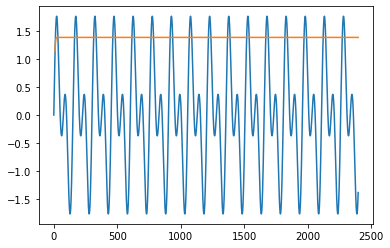

In [11]:
plt.plot(y)
plt.plot(list(range(10, 2400)), list_y_pred)
# plt.xlim(0, 200)